# Import packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix

# Load data

In [6]:
#load data and split to X_train, y_train, X_test, y_test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


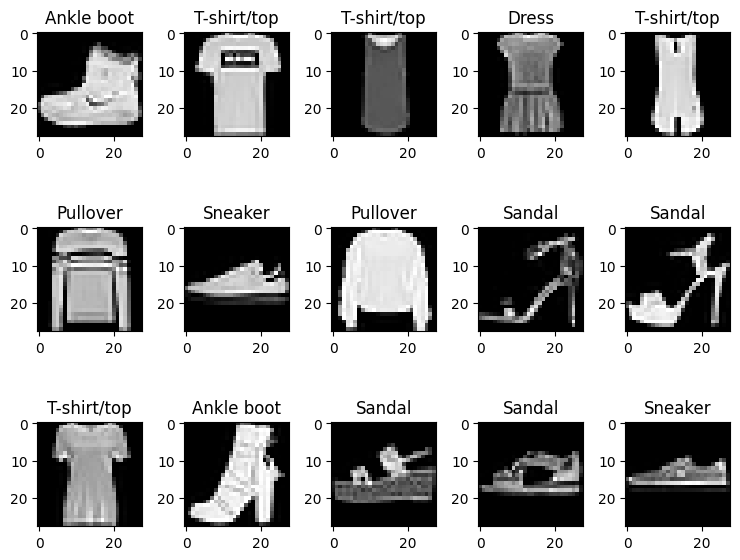

In [ ]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

#specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(class_labels_dict[y_train[i]])
plt.tight_layout()
plt.show()


# Format the data

In [ ]:
#reshape the input so that each 28x28 image becomes a single 784 dimensional vector
X_train = X_train.reshape([60000, 28 * 28])
X_test = X_test.reshape([10000, 28 * 28])


print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We also normalise the inputs so that pixel values are in the [0-1] range rather than [0-255].

In [ ]:
# normalise the inputs so that pixel values are in the [0-1] range rather than [0-255]

X_train = X_train.astype(float) /255
X_test = X_test.astype(float) /255

In [ ]:
#Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes= 10)
y_test = to_categorical(y_test, num_classes= 10)
y_train[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Build the neural network

In [ ]:
# fully connected network

model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

# Compile the model

In [ ]:

# compile a model with cross entropy loss function  and adam optimizer


model.compile(loss="categorical_crossentropy", optimizer='adam',
	metrics=["accuracy"])


In [ ]:
# fit your model on the training set
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
	epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2771 - accuracy: 0.8977 - val_loss: 0.3356 - val_accuracy: 0.8816
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2659 - accuracy: 0.9019 - val_loss: 0.3462 - val_accuracy: 0.8802
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2600 - accuracy: 0.9036 - val_loss: 0.3317 - val_accuracy: 0.8797
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2497 - accuracy: 0.9080 - val_loss: 0.3235 - val_accuracy: 0.8819
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2428 - accuracy: 0.9102 - val_loss: 0.3146 - val_accuracy: 0.8890
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2358 - accuracy: 0.9114 - val_loss: 0.3254 - val_accuracy: 0.8839
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2278 - accuracy: 0.9157 - val_loss: 0.3226 - val_accuracy: 0.8852

# Evaluate Performance

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


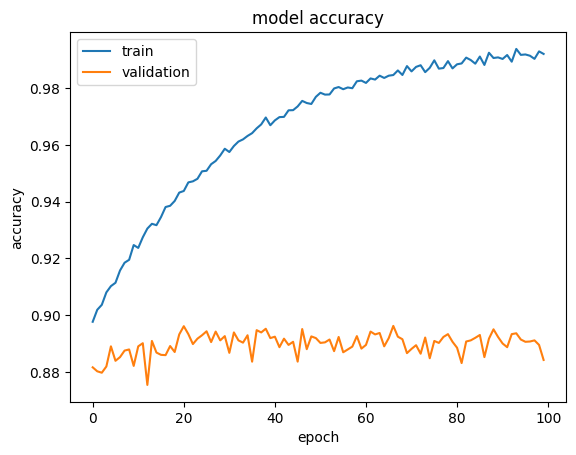

In [ ]:
# Plot the accuracy during the training and testing epochs
print(H.history.keys())
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Print the best accuracy in the test set and its training step
print('{} best accuracy in the training set'.format(max(H.history['accuracy'])))
print('{} best accuracy in the test set'.format(max(H.history['val_accuracy'])))

0.9938166737556458 best accuracy in the training set
0.8962000012397766 best accuracy in the test set


# Inspecting the output

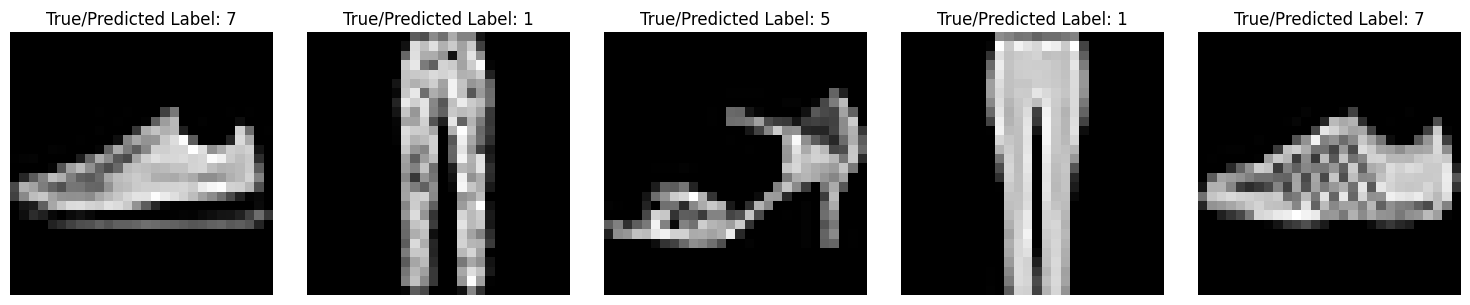

In [ ]:

# Find indices where the predicted label matches the true label
correct_indices = np.where(predicted_labels == y_test)[0]

# Select a random subset of correctly predicted examples
num_examples = 5
subset_indices = np.random.choice(correct_indices, size=num_examples, replace=False)

# Plot the images with their labels
plt.figure(figsize=(15, 3))
for i, idx in enumerate(subset_indices):
    img = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    predicted_label = predicted_labels[idx]

    plt.subplot(1, num_examples, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True/Predicted Label: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


313/313 [==============================] - 0s 1ms/step


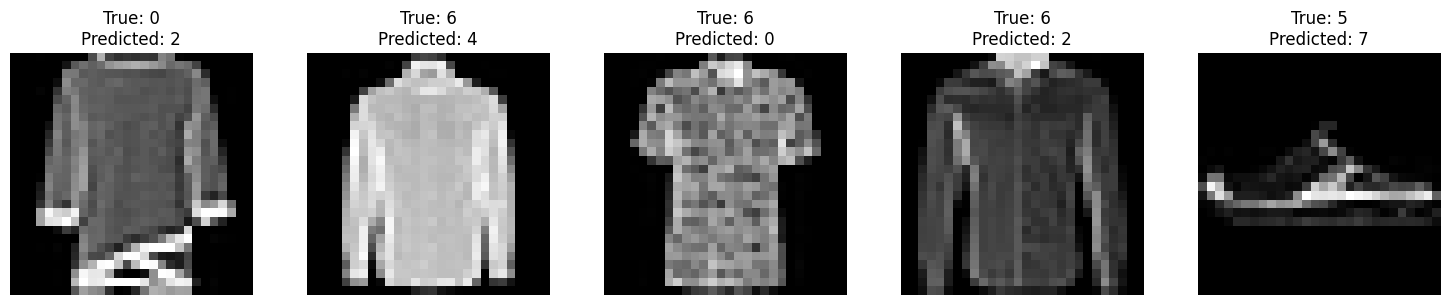

In [ ]:
# plot images
#y_pred = np.argmax(predictions , axis = 1)
#y_test = np.argmax(y_test , axis = 1)
# Predict labels for the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Find indices where the predicted label does not match the true label
incorrect_indices = np.where(predicted_labels != y_test)[0]

# Select a random subset of incorrectly predicted examples
num_examples = 5
subset_indices = np.random.choice(incorrect_indices, size=num_examples, replace=False)

# Plot the images with their correct labels
plt.figure(figsize=(15, 3))
for i, idx in enumerate(subset_indices):
    img = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    predicted_label = predicted_labels[idx]

    plt.subplot(1, num_examples, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Generate classification report
report = classification_report(y_test, predicted_labels)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.85      0.81      1000
           3       0.93      0.85      0.89      1000
           4       0.81      0.79      0.80      1000
           5       0.99      0.94      0.96      1000
           6       0.72      0.68      0.70      1000
           7       0.89      0.99      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



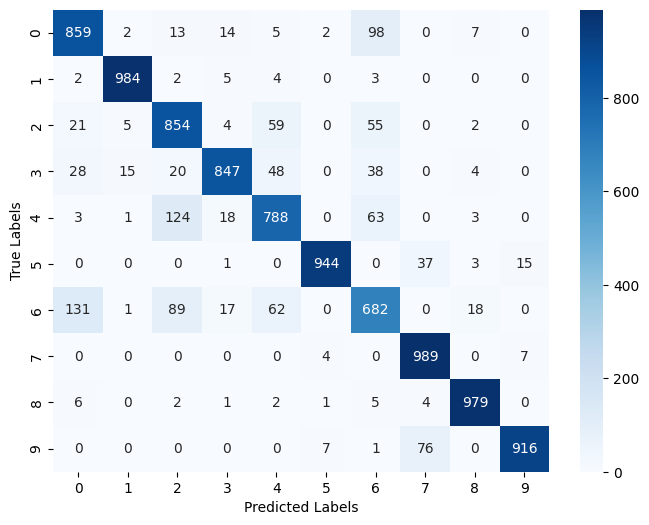

In [ ]:
# show confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
